In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_datareader
import datetime as dt
import pandas_datareader.data as web
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from pandas_datareader import data as pdr

from scipy.stats import norm
import statsmodels.api as sm

In [153]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Collecting yfinance
  Using cached yfinance-0.2.12-py2.py3-none-any.whl (59 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0



In [5]:
import yfinance as yf
yf.pdr_override()

In [127]:
data = yf.download("^NSEI", start = "2019-02-01", end = "2023-01-31")

[*********************100%***********************]  1 of 1 completed


In [128]:
df =pd.DataFrame(data)

In [129]:
df=df.reset_index()

In [130]:
df=df.iloc[:, [0,5]]

In [131]:
df.set_index("Date", inplace =True)

In [132]:
df.index = pd.to_datetime(df.index)

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [281]:
df= df[800:]

In [307]:
df

,Adj Close,first_dif,Seasonal_Difference,Forecast
Date,,,,
2022-05-06,16411.250000,-271.400391,NaN,NaN
2022-05-09,16301.849609,-109.400391,NaN,NaN
2022-05-10,16240.049805,-61.799805,NaN,NaN
2022-05-11,16167.099609,-72.950195,NaN,NaN
2022-05-12,15808.000000,-359.099609,NaN,NaN
...,...,...,...,...
2023-01-23,18118.550781,90.900391,126.400391,NaN
2023-01-24,18118.300781,-0.250000,258.851562,NaN
2023-01-25,17891.949219,-226.351562,-209.250000,NaN


(array([19113., 19144., 19174., 19205., 19236., 19266., 19297., 19327.,
        19358., 19389.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

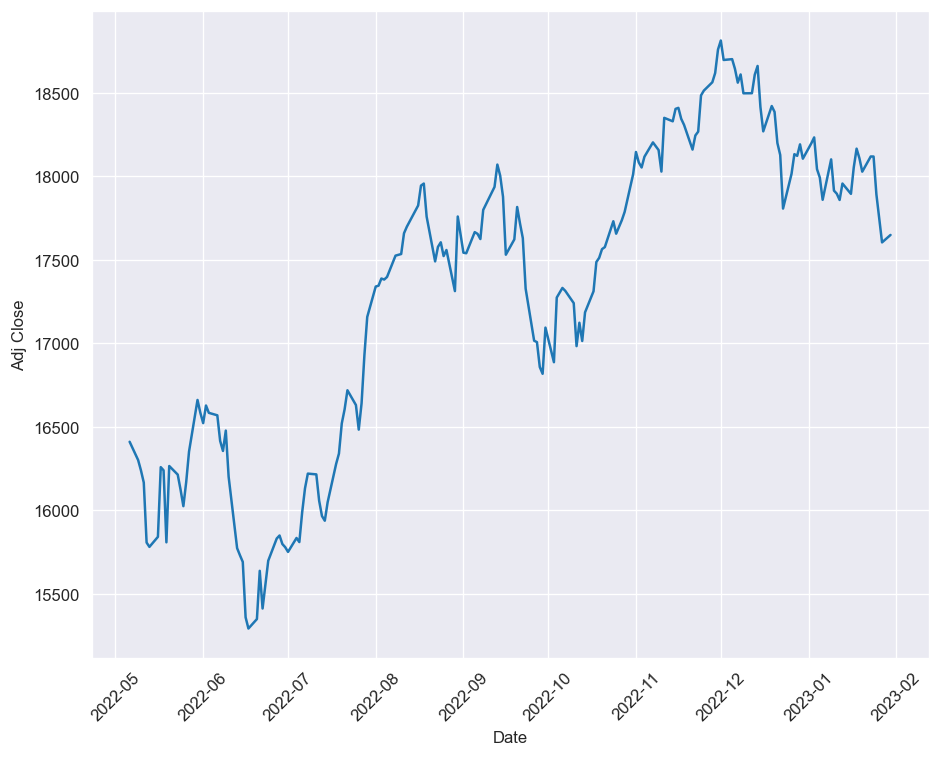

In [282]:
sns.lineplot(x=df.index, y=df["Adj Close"])
plt.xticks(rotation = 45)

skewness :%f -0.4361010236553739
Kurtosis:%f -1.0362511821516676


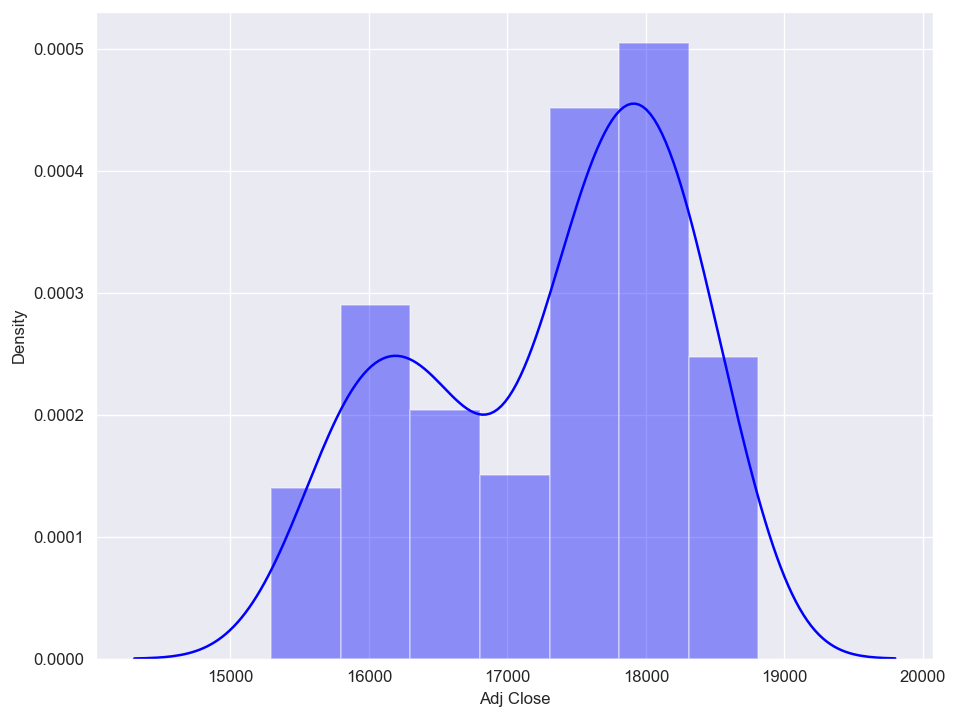

In [283]:
sns.distplot(df["Adj Close"], color="blue")
print("skewness :%f", df["Adj Close"].skew())
print("Kurtosis:%f", df["Adj Close"].kurt())#measuring the skewness and kurtosis with distplot

# the skewness is lower than -1 (negative skewed), the data are extremely skewed.
#  (Kurtosis < 3)


In [284]:
result = seasonal_decompose(df['Adj Close'],model = 'multiplicative',period = 12)

In [285]:
# ERROR TREND SEASONALITY(ETS) DECOMPOSITION

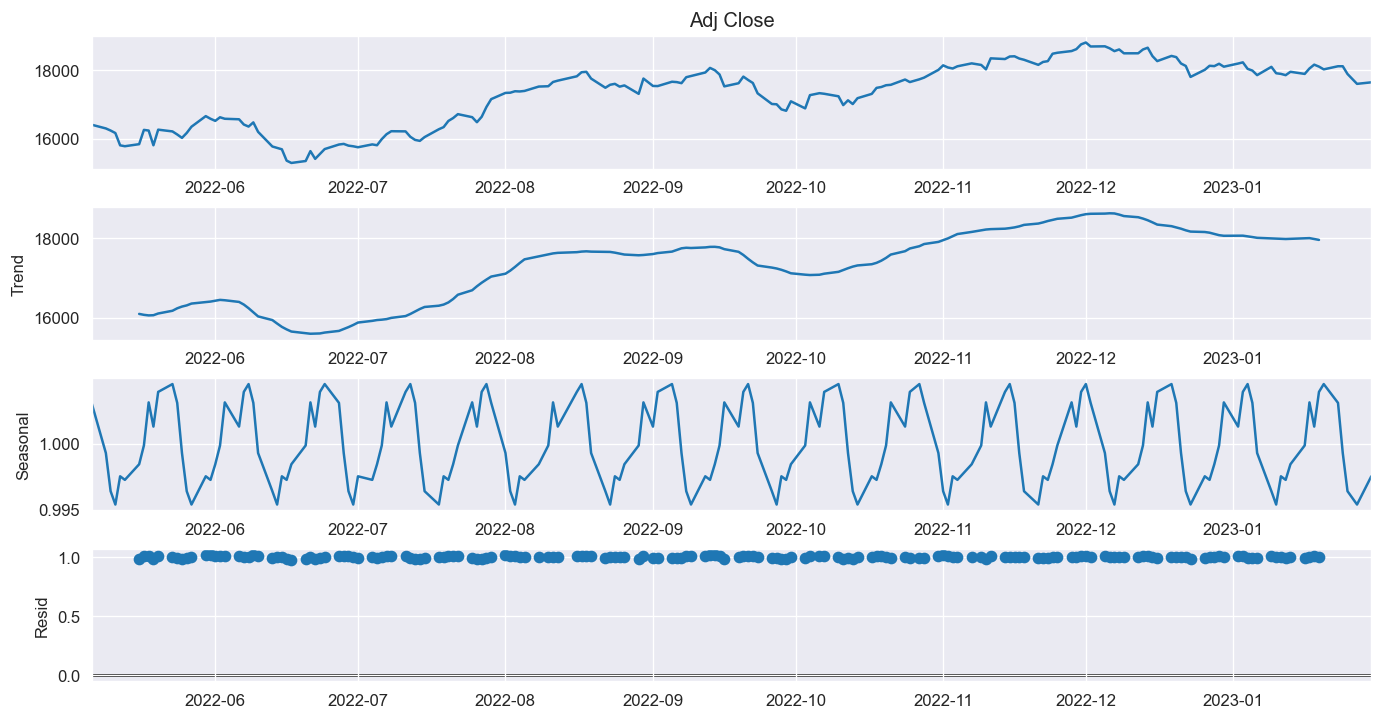

In [286]:
fig = result.plot()
fig.set_size_inches(12,6)

Stationarity implies that mean should be constant and variance should not depend on time and covariance (speed of change in variance)
should not be a function of time.
Dicky fuller test's null hypothesis is that data is non stationery,alternate it has no unit root and it is stationery, small p value shows strong
evidence against the null hypothesis https://people.duke.edu/~rnau/arimrule.htm

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

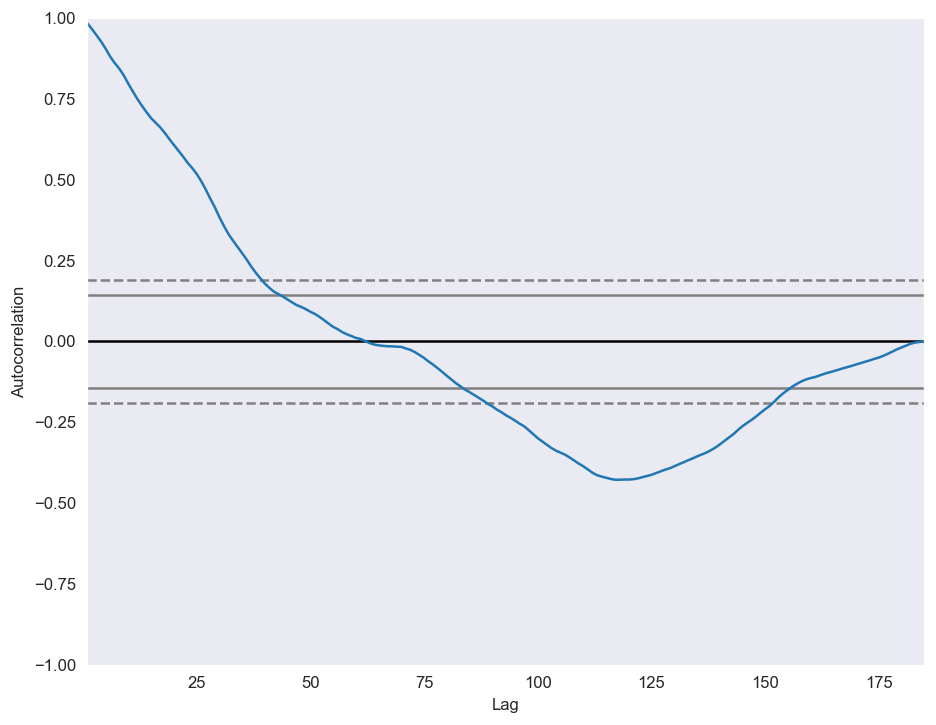

In [326]:
pd.plotting.autocorrelation_plot(df["Adj Close"])

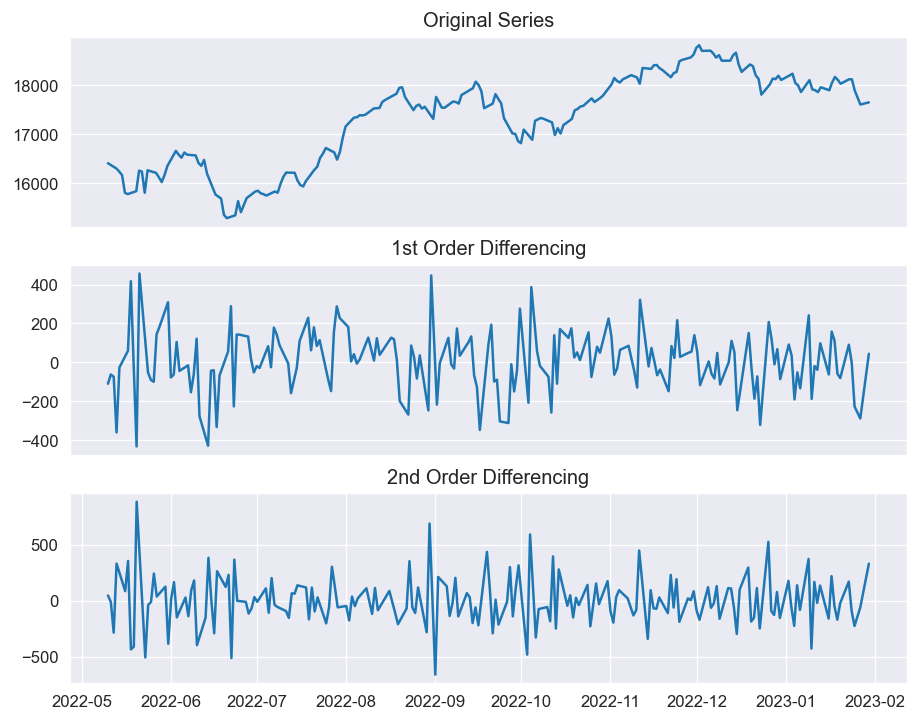

In [288]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df["Adj Close"]); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df["Adj Close"].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df["Adj Close"].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

In [289]:
from statsmodels.tsa.stattools import adfuller

In [290]:
ADF = adfuller(df["Adj Close"])

In [291]:
def ADF_CHECK(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ["ADF Test statistic","p-value","# of lags","Num of observations used"]
    for value,label in zip(result,labels):
        print(label + ":" + str(value))
        if result[1]<=0.05:
            print("Strong evidence against null hypothesis")
            print("Reject null hypothesis")
            print("Data does not have a unit root and is stationery")
        else:
            print("Weak evidence against null hypothesis")
            print("Fail to reject null hypothesis")
            print("Data has a unit root and it is non-stationery")

In [292]:
ADF_CHECK(df["Adj Close"])

Augmented Dicky-Fuller Test
ADF Test statistic:-1.3070621613804763
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and it is non-stationery
p-value:0.625935204534983
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and it is non-stationery
# of lags:0
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and it is non-stationery
Num of observations used:184
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and it is non-stationery


In [293]:
# if the shift 1 result reject the null hypothesis
ADF_CHECK(df["Adj Close"].diff().dropna())

Augmented Dicky-Fuller Test
ADF Test statistic:-13.203113634808561
Strong evidence against null hypothesis
Reject null hypothesis
Data does not have a unit root and is stationery
p-value:1.0843276827364546e-24
Strong evidence against null hypothesis
Reject null hypothesis
Data does not have a unit root and is stationery
# of lags:0
Strong evidence against null hypothesis
Reject null hypothesis
Data does not have a unit root and is stationery
Num of observations used:183
Strong evidence against null hypothesis
Reject null hypothesis
Data does not have a unit root and is stationery


<AxesSubplot:xlabel='Date'>

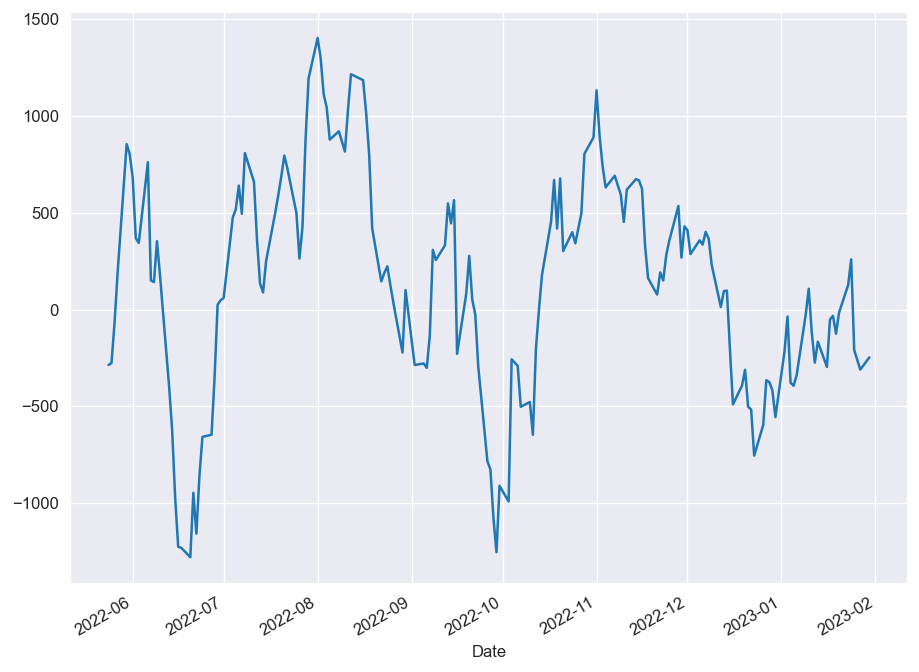

In [294]:
## Check for the deasonality of data with shift 12
df["Seasonal_Difference"] = df["Adj Close"]-df["Adj Close"].shift(12)
df["Seasonal_Difference"].plot()

In [295]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

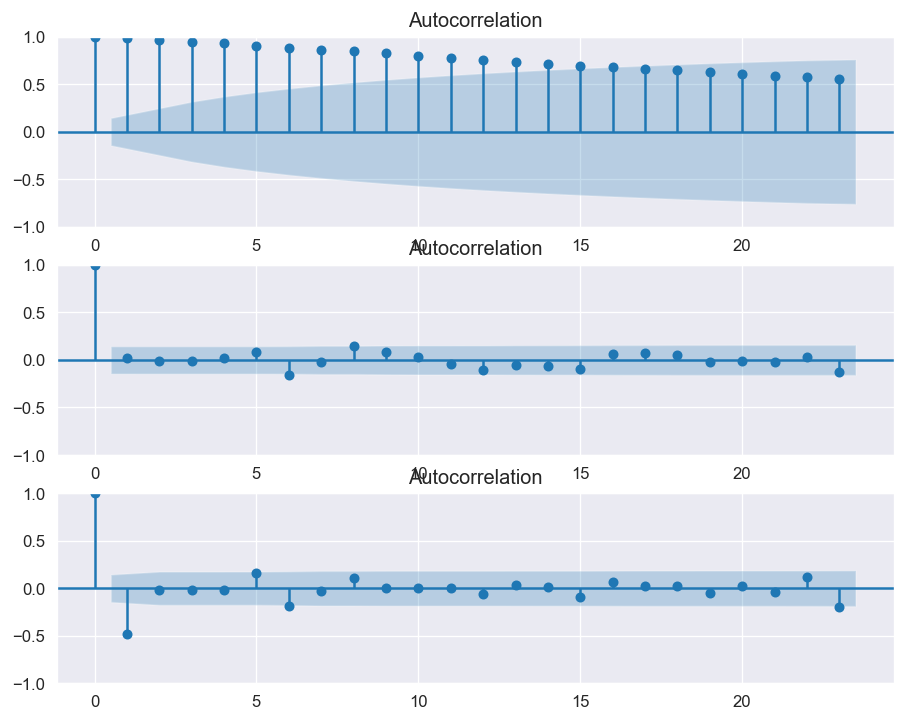

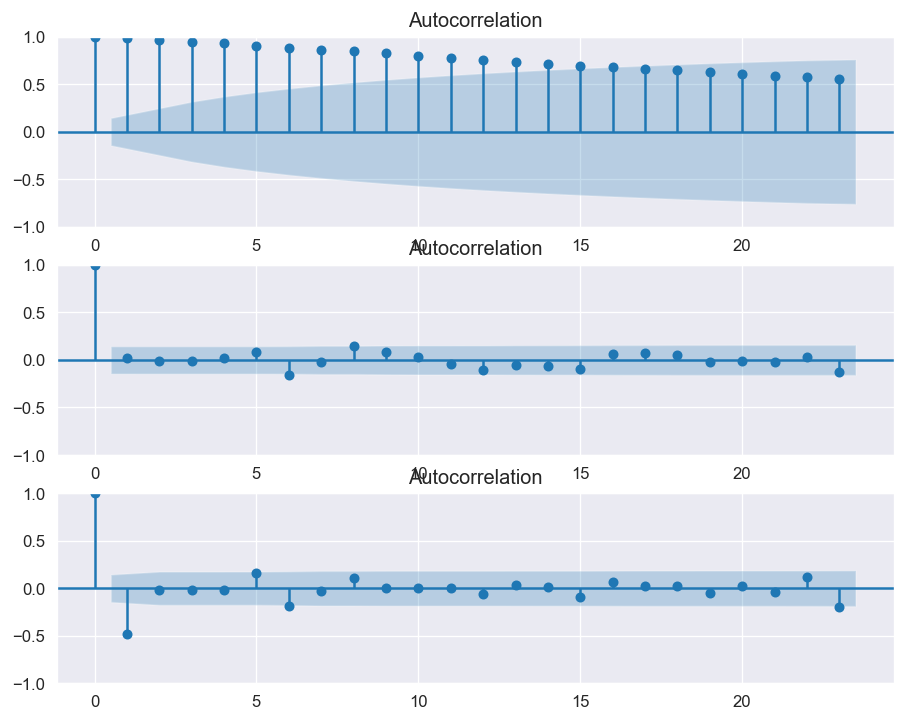

In [296]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df["Adj Close"], ax=ax1)
plot_acf(df["Adj Close"].diff().dropna(), ax=ax2)
plot_acf(df["Adj Close"].diff().diff().dropna(), ax=ax3)

# Here we can see that in second-order differencing the immediate lag has gone on the negative side, representing that in the second-order the series has become over the difference. 

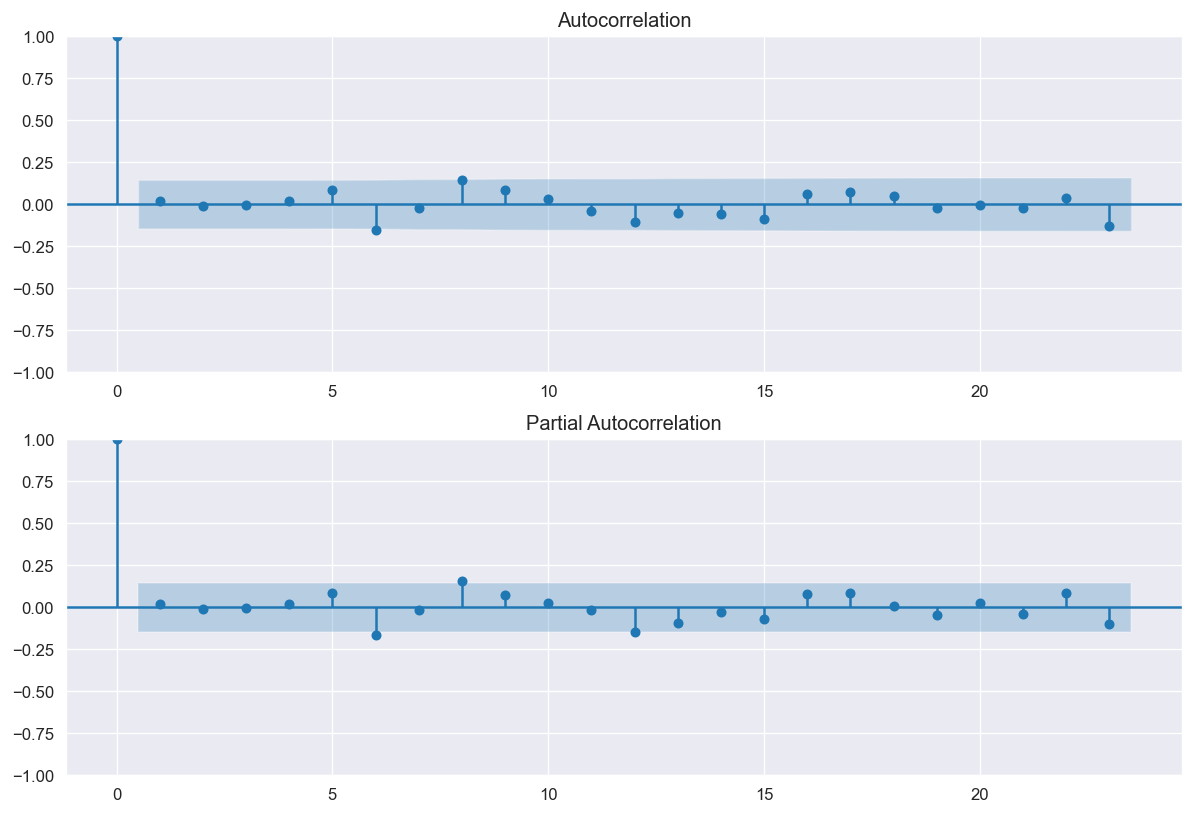

In [297]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Adj Close'].diff().dropna(),ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Adj Close'].diff().dropna(),ax=ax2)

## so AR =0, MA = 0 and D=1

In [298]:
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.statespace.SARIMAX(df["Adj Close"],order = (0,1,0),seasonal_order = (0,1,10,12)) #p,d,q
model_fit = model.fit(disp=0)
model_fit.summary()

C:\Users\sharu\anaconda3\envs\pandas_kl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sharu\anaconda3\envs\pandas_kl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sharu\anaconda3\envs\pandas_kl\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                    SARIMAX Results                                                     
========================================================================================================================
Dep. Variable:                                                        Adj Close   No. Observations:                  185
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 12)   Log Likelihood               -1117.866
Date:                                                          Sat, 04 Mar 2023   AIC                           2257.731
Time:                                                                  18:33:27   BIC                           2292.354
Sample:                                                                       0   HQIC                          2271.779
                                                                          - 185                                         
Covariance Type:                                                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.1190      1.239     -0.903      0.367      -3.548       1.310
ma.S.L24       0.4480      1.165      0.385      0.701      -1.835       2.731
ma.S.L36       0.0222      0.563      0.039      0.969      -1.081       1.126
ma.S.L48      -0.1222      0.465     -0.263      0.793      -1.034       0.790
ma.S.L60       0.0812      0.335      0.242      0.809      -0.576       0.738
ma.S.L72       0.2424      0.338      0.717      0.473      -0.420       0.905
ma.S.L84      -0.3621      0.940     -0.385      0.700      -2.204       1.479
ma.S.L96      -0.1287      0.346     -0.372      0.710      -0.807       0.550
ma.S.L108     -0.0352      0.191     -0.184      0.854      -0.409       0.339
ma.S.L120      0.1456      0.381      0.382      0.703      -0.602       0.893
sigma2      1.904e+04   3.13e+04      0.609      0.542   -4.22e+04    8.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.90   Prob(JB):                         0.77
Heteroskedasticity (H):               0.57   Skew:                             0.05
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

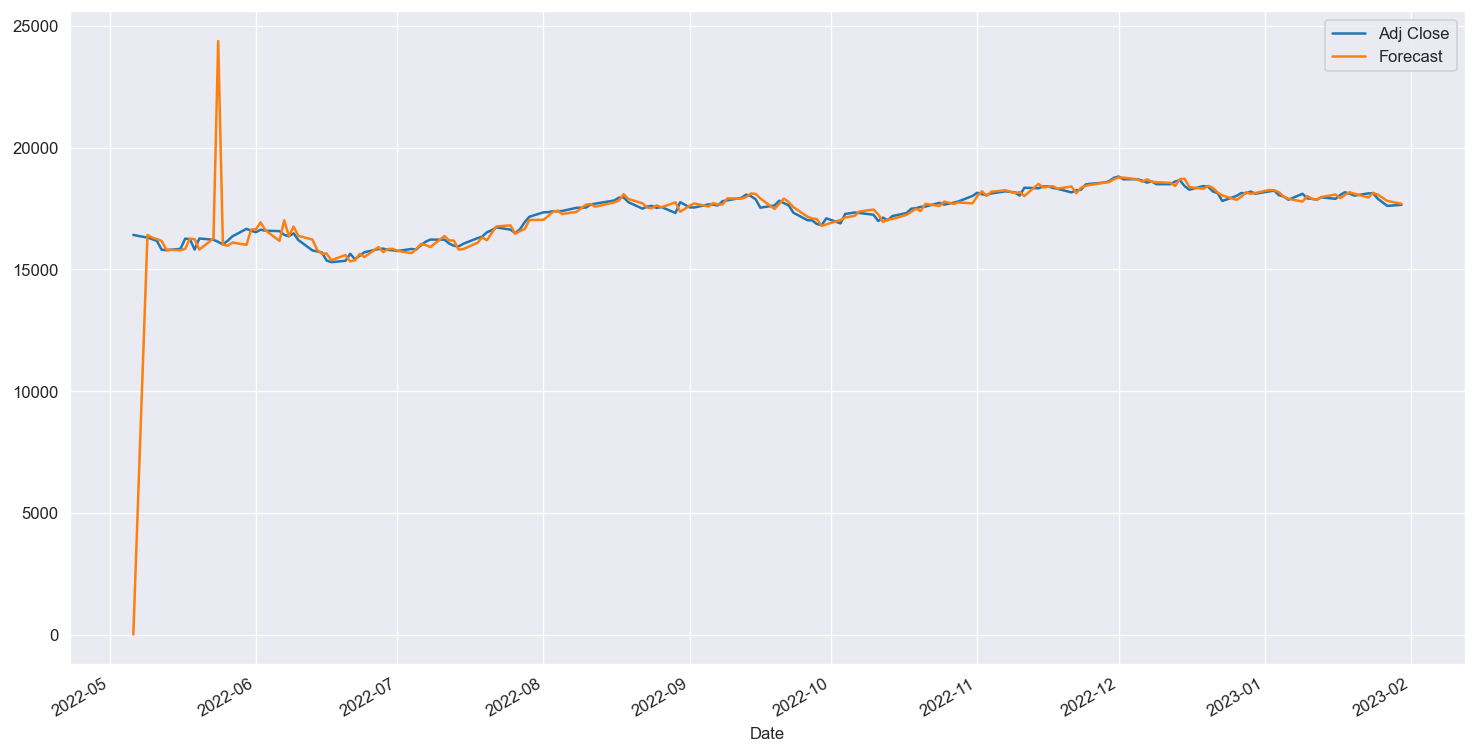

In [311]:
df["Forecast"] = model_fit.predict(dynamic = False)
df[["Adj Close","Forecast"]].plot(figsize = (15,8))